In [3]:
!python --version

Python 3.8.10


In [1]:
from pdf2image import convert_from_path

In [8]:
pdf_doc_path = r'docs\prescription\pre_1.pdf'

In [9]:
pages = convert_from_path(pdf_path=pdf_doc_path,
                          
                          poppler_path=r'D:\Medical_project\backend\poppler-22.04.0\Library\bin')

In [10]:
len(pages)

1

In [11]:
pages  ## each single page of pdf get converted into image

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x1F0D4F375B0>]

In [12]:
pages[0].show()

In [13]:
import pytesseract

In [14]:
## tesseract engine path
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(pages[0], lang='eng')
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

—momennannenncmneneunnmnnnnninsissiyoinnitnahaadaanih issn earnttneenrenen:

Prednisone 20 mg
Lialda 2.4 gram

3 days,

or 1 month


- not getting text from pdf exactlt same beacuse of darker region in image.

- we will use openCV to do some image processing to make image suitable for getting all text of image in exactly same way as it is there in image.

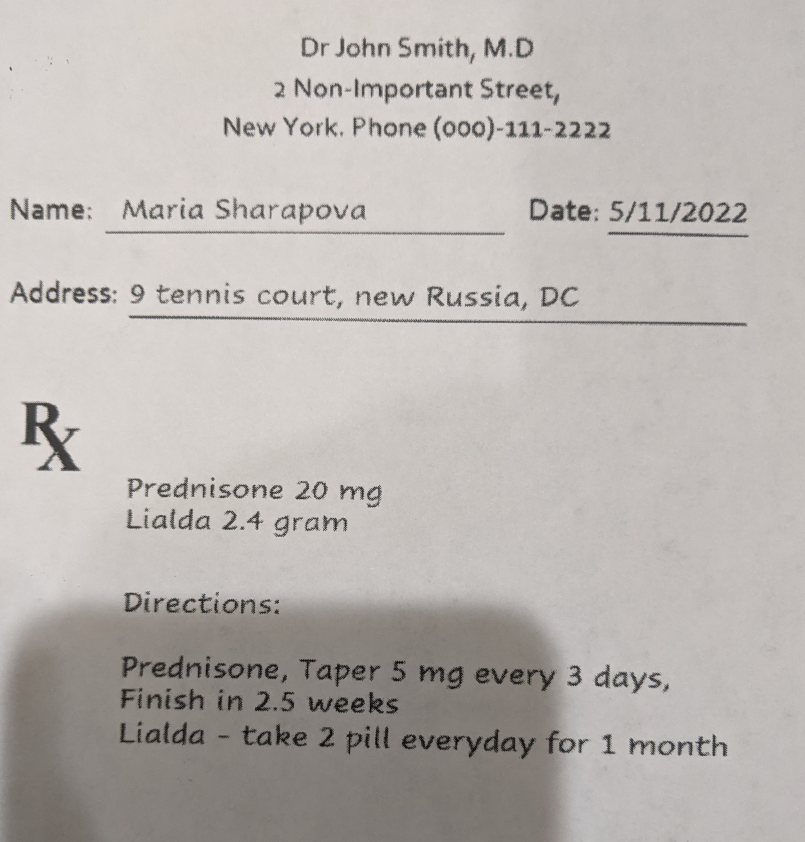

- Now we will use here the concept of Adaptive Thresholding, discussed in cv_concepts notebook

In [20]:
import numpy as np
import cv2
from PIL import Image

def preprocess_image(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 61, 11)  
    return processed_image

In [22]:
preprocessed_img = preprocess_image(pages[0])

In [23]:
Image.fromarray(preprocessed_img).show()

In [24]:
## tesseract engine path
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(preprocessed_img, lang='eng')
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Marta Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:

Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks a
Lialda - take 2 pill everyday for 1 month

Refill: 2 times


- This time better result we get than before....

- Lets perform same operation on second pdf we have...

In [25]:
pdf_doc_path = r'docs\prescription\pre_2.pdf'

In [26]:
pages = convert_from_path(pdf_path=pdf_doc_path,
                          
                          poppler_path=r'D:\Medical_project\backend\poppler-22.04.0\Library\bin')

In [28]:
## tesseract engine path
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(pages[0], lang='eng')
print(text)

Refill: 3 times


In [30]:
preprocessed_img_2 = preprocess_image(pages[0])

In [31]:
## tesseract engine path
pytesseract.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(preprocessed_img_2, lang='eng')
print(text)

Dr John >mith, M.D

2 Non-Important street,
New York, Phone (900)-323- ~2222

Name:  Virat Kohli Date: 2/05/2022

Address: 2 cricket blvd, New Delhi

| Omeprazole 40 mg

Directions: Use two tablets daily for three months

Refill: 3 times
